<a href="https://www.kaggle.com/code/oxiaofango/all-the-unicorns-in-the-world?scriptVersionId=173716840" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# All the Unicorns in the World
<img src="https://www.expats.cz/images/publishing/articles/2022/02/1280_650/illustrative-image-nuthawut-somsuk-fdpmb.webp" width="500" height="500">

## What is Unicorn?
Unicorn companies are a select group of privately held startups that have achieved a valuation of over `$1 billion`. These companies are renowned for their exceptional growth, disruptive innovation, and substantial market potential. Emerging primarily in technology-driven sectors such as software, e-commerce, biotechnology, and fintech, unicorns leverage cutting-edge technologies, business models, and strategies to secure significant market share and attract substantial investments from venture capitalists, private equity firms, and institutional investors.

Their success stories serve as beacons of inspiration for aspiring entrepreneurs and as benchmarks for measuring innovation and entrepreneurial excellence. Unicorn companies play a pivotal role in driving economic growth, job creation, and industry transformation.

## Objective:
Analyzing this data yields valuable insights into global trends within the startup ecosystem, investor preferences, geographic distribution of unicorns, industry dynamics, and factors contributing to their success. Utilizing data visualization techniques such as charts, graphs, maps, and dashboards facilitates a deeper understanding of these insights, enabling stakeholders to make informed decisions regarding investment, entrepreneurship, and industry strategy.

#### Unraveling Core Questions
1. Over the past decade, excluding 2024, which year saw the greatest emergence of unicorn companies?
2. Which industry stands out as the most dynamic and promising?
3. We will delve into whether Enterprise Tech is the leading sector in birthing unicorn companies.
4. Explore the sum, mean, and median valuations of unicorn companies to uncover any intriguing insights.
5. Top 20 countries with unicorn companies.

## About Dataset

The provided dataset comprises information about notable unicorn companies from various industries around the world. Here's a description of the dataset:

| Column Name     | Description | 
|-----------------|-------------|
| Company         | The name of the unicorn company.     |
| Valuation (B)   | The valuation of the company, measured in billions of dollars, indicating its market worth and financial standing.|
| Date Joined     | The date when the company attained unicorn status, signifying the milestone of achieving a valuation of over 1 billion.|
| Country         | The country where the company is headquartered, representing its geographical location.
| City            | The city within the country where the company's headquarters are situated, providing further insight into its operational base.|
| Industry        | The sector or industry in which the company operates, encompassing a diverse range of fields such as technology, finance, healthcare, and consumer goods.|


## Data Process:
#### 1. Data Discovering:
Let's import required libraries and start discovering the dataset.

In [1]:
#### Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

Let's read the excel file and observe first 5 rows of data.

In [2]:
#### Read excel file and observe first 5 rows of data
unicorns = pd.read_csv("/kaggle/input/all-the-unicorns-in-the-world/List of Unicorns in the World.csv")
unicorns.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment
1,1,SpaceX,$150,12/1/2012,United States,Hawthorne,Industrials
2,2,OpenAI,$80,7/22/2019,United States,San Francisco,Enterprise Tech
3,3,SHEIN,$66,7/3/2018,Singapore,Singapore City,Consumer & Retail
4,4,Stripe,$65,1/23/2014,United States,San Francisco,Financial Services


In [3]:
##### Let's look at the data type of each column
print(unicorns.dtypes)
## Now we saw that the "Date Joined" is an object and Valuation ($B) includes "$" which might affect the calculation later.

Unnamed: 0         int64
Company           object
Valuation ($B)    object
Date Joined       object
Country           object
City              object
Industry          object
dtype: object


From the observation of the data and datatypes, we can see that there are 2 things that we need to address.
1. The field`Date Joined` is an object data type
2. The field `Valuation ($B)` is an object data type and includes "$" which might affect the data analysis later.

Next, we look at if there is any duplicate data or missing data

In [4]:
#### Firstly, lets look at if there is any duplicate data. I will use company to check on duplicate
unicorns[unicorns["Company"].duplicated(keep = False)].sort_values(by = "Company")

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
38,38,Bolt,$11,10/8/2021,United States,San Francisco,Financial Services
66,66,Bolt,$8.40,5/29/2018,Estonia,Tallinn,Industrials
204,204,Branch,$4,9/10/2018,United States,Redwood City,Enterprise Tech
938,938,Branch,$1.05,3/1/2022,United States,Columbus,Insurance
664,664,Fabric,$1.50,2/24/2022,United States,Bellevue,Consumer & Retail
1148,1148,Fabric,$1,10/26/2021,United States,New York,Consumer & Retail
176,176,Relativity,$4.20,11/23/2020,United States,Inglewood,Industrials
225,225,Relativity,$3.60,3/18/2021,United States,Chicago,Enterprise Tech


In [5]:
#### Secondly, checking any missing data
unicorns.isna().sum()

Unnamed: 0        0
Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
dtype: int64

From the observations above, we can see that there is no missing data; however, there are 8 duplicated data entries. We can proceed as follows:

Check with the data owner regarding the duplicated dataset.
The `Date Joined`, `Country`, and `Industry` fields are different. Let's assume that these represent different companies sharing the same company name. We will keep the data for analysis.

Thereafter, we will use `Industry` field as one of the criteria for analysis. Let's check the spelling to ensure consistency. We will also look at the statistic of this dataset.

In [6]:
##### Let's check if there is any mispelling in Industry
unicorns["Industry"].value_counts()
## okay, the industry name seem correct.

Industry
Enterprise Tech               388
Financial Services            220
Consumer & Retail             213
Industrials                   185
Healthcare & Life Sciences    117
Media & Entertainment          83
Insurance                      26
Health                          1
Name: count, dtype: int64

In [7]:
#### Let's look at the statistic of this dataset.
unicorns.describe()

,Unnamed: 0
count,1233.000000
mean,616.000000
std,356.080749
min,0.000000
25%,308.000000
50%,616.000000
75%,924.000000
max,1232.000000


Great! The `Industry` names appear to be correct and consistent. The `Date Joined` entries in this dataset range from the year 2007 to 2024. Since the year 2024 has not yet concluded, we will focus our analysis on the 10-year data span up to 2023.

Next, we will start preparing data for analysis.

#### 2. Prepare data for analysis:
1. Update the `Date Joined` field into date format
2. Remove "$" in  `Valuation ($B)` field and store it in new column called `New Valuation`.
3. Create a 2 more new columns called `Unicorn Year` and `Unicorn Month` for analysis later.
4. Extract the 10 year data span up to year 2023 for data analysis.

In [8]:
#### Update the "Date Joined" into date format
unicorns["Date Joined"] = pd.to_datetime(unicorns["Date Joined"])

#### Let's check on the data type is updated to datetime
print(unicorns.dtypes)

Unnamed: 0                 int64
Company                   object
Valuation ($B)            object
Date Joined       datetime64[ns]
Country                   object
City                      object
Industry                  object
dtype: object


In [9]:
#### The column contains of decimal point
unicorns[unicorns["Valuation ($B)"].str.contains("\.")]

#### Remove "$" and store it in new column called "New Valuation"
unicorns["New Valuation"] = unicorns["Valuation ($B)"].str.strip("$").astype("float")

#### Let's look at the data and check if New Valuation is in correct format.
unicorns.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,New Valuation
0,0,ByteDance,$225,2017-04-07,China,Beijing,Media & Entertainment,225.0
1,1,SpaceX,$150,2012-12-01,United States,Hawthorne,Industrials,150.0
2,2,OpenAI,$80,2019-07-22,United States,San Francisco,Enterprise Tech,80.0
3,3,SHEIN,$66,2018-07-03,Singapore,Singapore City,Consumer & Retail,66.0
4,4,Stripe,$65,2014-01-23,United States,San Francisco,Financial Services,65.0


In [10]:
#### Create a 2 more new columns called `Unicorn Year` and `Unicorn Month` for analysis later
unicorns["Unicorn Year"] = unicorns["Date Joined"].dt.year

unicorns["Unicorn Month"] = unicorns["Date Joined"].dt.month_name().str.slice(stop = 3)
unicorns.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,New Valuation,Unicorn Year,Unicorn Month
0,0,ByteDance,$225,2017-04-07,China,Beijing,Media & Entertainment,225.0,2017,Apr
1,1,SpaceX,$150,2012-12-01,United States,Hawthorne,Industrials,150.0,2012,Dec
2,2,OpenAI,$80,2019-07-22,United States,San Francisco,Enterprise Tech,80.0,2019,Jul
3,3,SHEIN,$66,2018-07-03,Singapore,Singapore City,Consumer & Retail,66.0,2018,Jul
4,4,Stripe,$65,2014-01-23,United States,San Francisco,Financial Services,65.0,2014,Jan


In [11]:
#### Extract the 10 year data span up to year 2023 for data analysis.
list_of_year = sorted(set(unicorns["Unicorn Year"]))[-11:-1]

unicorns_10_years = unicorns[unicorns["Unicorn Year"].isin(list_of_year)]

print(unicorns_10_years.shape)
unicorns_10_years.head()

(1205, 10)


,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,New Valuation,Unicorn Year,Unicorn Month
0,0,ByteDance,$225,2017-04-07,China,Beijing,Media & Entertainment,225.0,2017,Apr
2,2,OpenAI,$80,2019-07-22,United States,San Francisco,Enterprise Tech,80.0,2019,Jul
3,3,SHEIN,$66,2018-07-03,Singapore,Singapore City,Consumer & Retail,66.0,2018,Jul
4,4,Stripe,$65,2014-01-23,United States,San Francisco,Financial Services,65.0,2014,Jan
5,5,Databricks,$43,2019-02-05,United States,San Francisco,Enterprise Tech,43.0,2019,Feb


## Deep Dive into Analysis:
Now, lets look at the core questions that we are focusing:
1. Over the past decade, excluding 2024, which year saw the greatest emergence of unicorn companies?
2. Which industry stands out as the most dynamic and promising?
3. We will delve into whether Enterprise Tech is the leading sector in birthing unicorn companies.
4. Explore the sum, mean, and median valuations of unicorn companies to uncover any intriguing insights.
5. Top 20 countries with unicorn companies.

<br>

#### Data Analysis:
**Question 1:** Over the past decade, excluding 2024, which year saw the greatest emergence of unicorn companies?

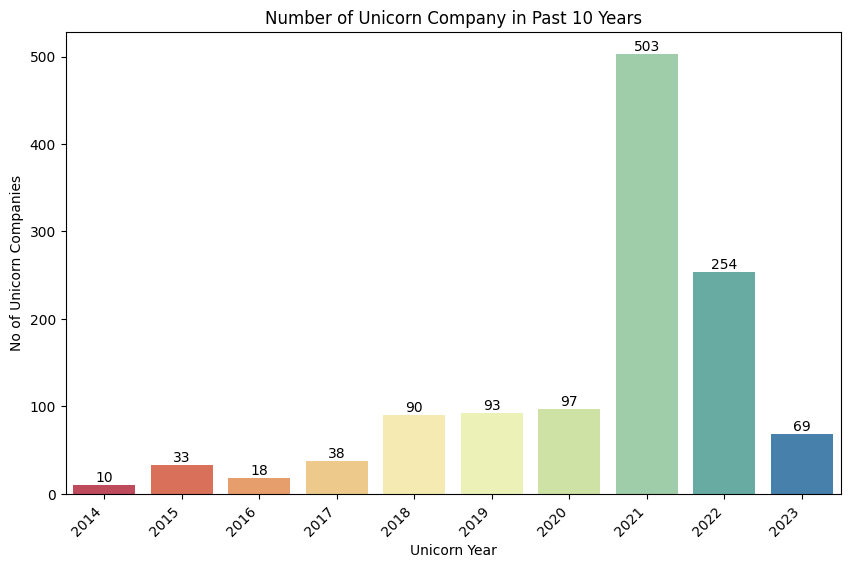

In [12]:
#### Define a write labels function
def write_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.
                 ,height + 0.5,int(height)
                 ,ha = "center"
                 ,va = "bottom")   
        
#### Let's create a group by dataset and plot a graph to check which year has the highest unicorn companies.
unicorn_company_by_year =(unicorns_10_years.groupby(["Unicorn Year"])
                                 .count()
                                 .reset_index()[["Unicorn Year", "Company"]])

plt.figure(figsize = (10,6))
barplot = sns.barplot(data = unicorn_company_by_year,
           x = "Unicorn Year",
           y = "Company",
           palette = "Spectral")    

plt.xticks(rotation = 45, horizontalalignment = "right")
plt.title("Number of Unicorn Company in Past 10 Years")
plt.ylabel("No of Unicorn Companies")
write_labels(barplot.patches)
plt.show()

## Now we know that in year 2021 is the year that most company reach unicorn status.

**Finding 1**:
The year `2021` recorded the highest number of unicorn companies. It was also a year marked by the COVID-19 pandemic, during which most countries enforced lockdown policies and a significant number of employees worked from home. This observation leads to another question: Why did 2021, amid the pandemic, witness the highest emergence of unicorn companies? 

<br>

**Question 2:** Continue from finding 1 , let's explore which industry stands out as the most dynamic and promising to address the question.

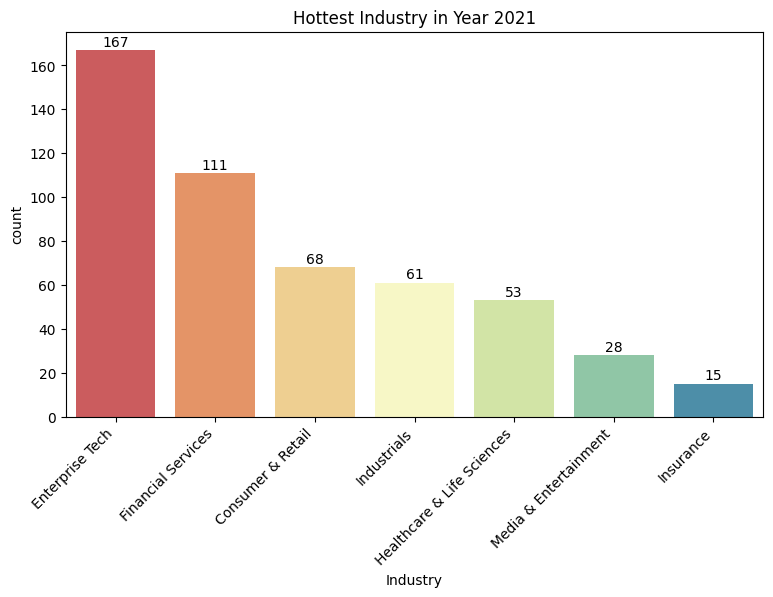

In [13]:
#### Let's zoom in year 2021, which industry stand out as the most dynamic and promissing
unicorns_2021_industry = (unicorns_10_years[unicorns_10_years["Unicorn Year"] == 2021]["Industry"]
                          .value_counts()
                          .reset_index())

plt.figure(figsize = (9,5))
barplot2 = sns.barplot(data = unicorns_2021_industry,
           y = "count",
           x = "Industry",
           palette = "Spectral")

write_labels(barplot2.patches)
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.title("Hottest Industry in Year 2021")
plt.show()

**Finding 2**:
Now, we have some ideas. Let's discuss why following top 3 industries that achieved unicorn status during the Covid-19 Pandemic:
<br>
* **Enterprise Tech:**<br>
    The Enterprise Tech industry saw significant growth during the Covid-19 pandemic, as businesses worldwide accelerated their digital transformation effort. With remote work become the new norm, there was an increased demand for cloud computing services, cybersecurity solutions, collaboration tools, and automation technologies. Companies within this industry that offered innovative solutions to facilitate  remote operations, enhance digital security, and improve business efficiency quickly rose to prominence, attracting substantial investment and reaching unicorn status. <br>
    
* **Financial Services:**<br>
    The Financial Services, particularly FinTech, experienced rapid growth during the pandemic. As physical banking services and face to face financial transactions became challenging due to lockdowns and social distancing measures, consumers and businesses turned to digital financial services. FinTech companies offering online banking, mobile payment solutions, digital wallets and personal finance management tools saw a surge in adoption. This shift towards digital financial services played a cruicial role in propelling many FinTech companies to unicorn status, highlighting the industry's resillence and innovation. <br>
    
* **Consumer & Retail:** <br>
    The Consumer & Retail industry, especially the e-commerce and direct-to-consumer segment, thrived during the pandemic. With lockdowns in place and consumers hesitant to shop in physical stores, there was a significant pivot towards online shopping. E-commerce platform, online marketplaces and direct-to-consumer brands that could offer convenient, safe and efficient online shopping experiences gained rapid traction. The pandemic also saw the rise of companies specialising in e-commerce logistics, online grocery delivery and digital health and wellness products. This consumer shift to online platforms contributed to the rapid growth and unicorn status achievement of several companies in this industry.
    
<br>   

**Question 3:** Now we know that `Enterprise Tech` industry has the highest number of unicorn company in 2021. Let's delve into whether `Enterprise Tech` is the leading indsutry in birthing unicorn companies in past 10 years.


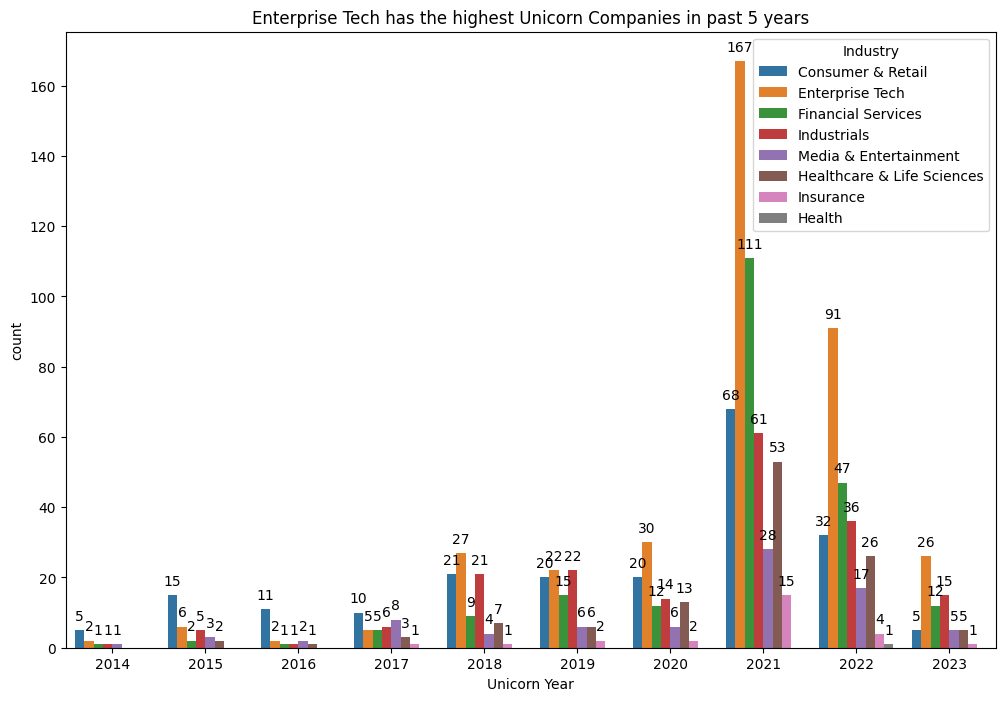

In [14]:
#### define a write label function for multiple bars
def write_labels2(plot):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), ".0f"),# format directly to string
                     (p.get_x() + p.get_width()/2.,p.get_height()),
                      ha = "center", va = "center",
                      xytext = (0,10),
                      textcoords = "offset points") 
        
#### Let's delve into whether `Enterprise Tech` is the leading sector in birthing unicorn companies.
unicorns_10_years_industry_grouped  = (unicorns_10_years[["Unicorn Year", "Industry"]]
 .groupby(["Unicorn Year", "Industry"])
 .value_counts()
 .reset_index())

plt.figure(figsize = (12,8))
barplot = sns.barplot(data = unicorns_10_years_industry_grouped,
           x = "Unicorn Year",
           y = "count",
           hue = "Industry",
           palette = "tab10")

write_labels2(barplot)
plt.title("Enterprise Tech has the highest Unicorn Companies in past 5 years")
plt.show()

## As we can see below, Enterprise Tech has gradually increase in past 10 years
## It reaches the peak in year 2021 together with Financial services and Consumer & Retail
## This could be due to Covid 19, most of the businesses are digitalized.

**Finding 3**:
We have some observations:
1. `Enterprise Tech` was not leading industry in birthing unicorn companies in past 10 years until 2018. Here are some potential reasons:
    * Digital Transformation Acceleration
    * Increase in Remote Work
    * Advancements in AI and Machine Learning
    * Globalization of Technology
    * Regulatory Changes and Cybersecurity
    
2. One notable observation is in `Healthcare & Life` Sciences. It has seen a fourfold increase in 2021 compared to the year before. COVID-19 has driven a significant rise in the number of unicorn companies in this industry.
 
<br>

**Question 4:** Now, let's explore the sum, mean, and median valuations of unicorn companies to uncover any intriguing insights.

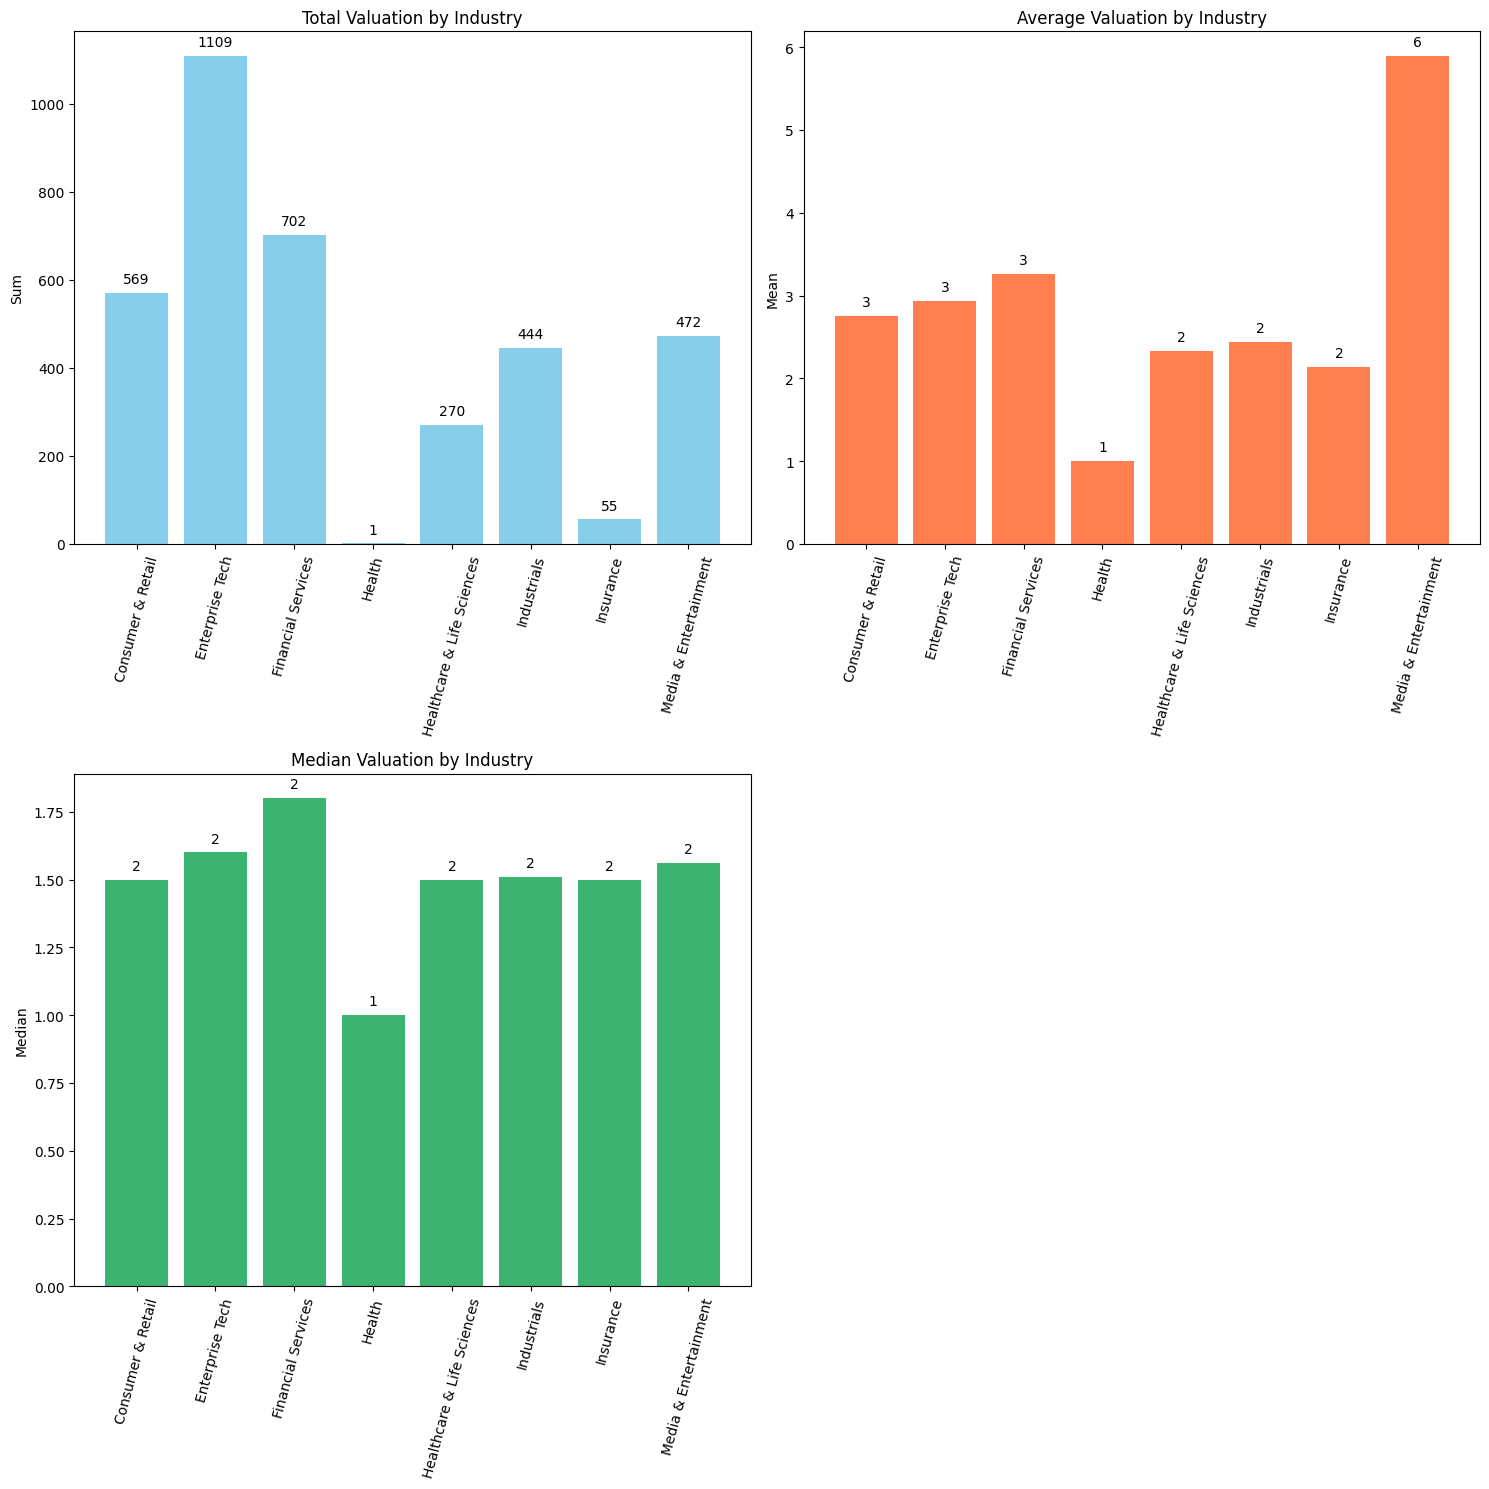

In [15]:
#### Let's look at the sum, mean and median of valuation of unicorns company
unicorns_agg = unicorns_10_years.groupby("Industry")["New Valuation"].agg(['sum', 'mean', 'median']).reset_index()

# Setting the figure and axes for the subplots
fig, axs = plt.subplots(2,2, figsize=(15,15)) # 2 rows and 1 col for sum,mean and median

# Sum Plot
axs[0,0].bar(unicorns_agg["Industry"], unicorns_agg["sum"], color = "skyblue")
axs[0,0].set_title("Total Valuation by Industry")
axs[0,0].set_ylabel("Sum")
axs[0,0].tick_params("x", labelrotation = 75)
write_labels2(axs[0,0])

# Mean Plot
axs[0,1].bar(unicorns_agg["Industry"], unicorns_agg["mean"], color = "coral")
axs[0,1].set_title("Average Valuation by Industry")
axs[0,1].set_ylabel("Mean")
axs[0,1].tick_params("x", labelrotation = 75)
write_labels2(axs[0,1])

# Median Plot
axs[1,0].bar(unicorns_agg["Industry"], unicorns_agg["median"], color = "mediumseagreen")
axs[1,0].set_title("Median Valuation by Industry")
axs[1,0].set_ylabel("Median")
axs[1,0].tick_params("x", labelrotation = 75)
write_labels2(axs[1,0])

# The fourth subplot (axs[1, 1]) is not used; you can leave it empty, or hide it
axs[1, 1].axis('off')

# Adjust layout to not overlap
plt.tight_layout()

# Show the plot
plt.show()

**Finding 4:** Following is industry specific insights:
* `Enterprise Tech` leads with a total valuation of **1109**, indicating it has the highest cumulative value among listed industry. This suggests a large presence of high-valued companies within this industry.<br>

* `Median & Entertainment` stands out with the highest mean valuation of **6**, suggesting that on average, companies in this industry are valued higher than those in other industries. However, a median close to other section, suggesting a few high-value companies skewing the average upwards. <br>

* `Health` show an anomaly with sum, mean and median all at **1**. This is due to only 1 unicorn company within 10 years.<br>

* The median across industries are relatively close, mostly around **1.5**. 

<br>

**Question 5**: Top 20 countries with unicorn companies.

In [16]:
unicorns_10_years_top_20 = unicorns_10_years["Country"].value_counts()[:20].reset_index()

plt.figure(figsize = (15,15))
fig = px.scatter_geo(unicorns_10_years_top_20, 
              locations = "Country",
              locationmode = "country names",
              color = "Country",
              size = "count",
              title = "Top 20 Countries with Unicorn Companies")

fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<Figure size 1500x1500 with 0 Axes>

**Finding 5:**
* The United States boasts the highest number of unicorn companies, followed by China and India.
* The number of unicorn companies in the United States is four times greater than that of its closest follower, China.
* United States positions as the dominant leader in the global unicorn company landscape. This trend underscores the United States's substantial and continued influence in fostering high value startups.



## Conclude with Impact:

From this dataset, we've learnt several key insights:
1. Despite 2021 being a year marked by the Covid-19 pandemic, it paradoxically generated the highest number of unicorn companies in the past decade.

2. The leading industries in 2021 were Enterprise Tech, Financial Services, and Consumer & Retail.

3. Enterprise Tech wasn't a frontrunner in birthing unicorn companies in the decade leading up to 2018.

4. Media & Entertainment has the highest average valuation yet its median is more in line with other industries. This suggests that a few high valued companies are skewing the average upwards.

5. The United Status stands as the dominant leader in the global unicorn company landscape.

**Thank you for reading. Any comments or recommendation are welcome. :)** <br>

Feel free to click <a href = "https://public.tableau.com/app/profile/xiao.fang/viz/AlltheUnicornsintheWorld/Story1">here </a> for Tableau Analysis.

<img src="https://img.freepik.com/free-vector/cute-unicorn-bite-love-cartoon-vector-icon-illustration-animal-nature-icon-concept-isolated-premium-vector-flat-cartoon-style_138676-4091.jpg?w=996&t=st=1712847959~exp=1712848559~hmac=d47f643d0f77a0898aa96acc803789f604adcf80ea924e91fe7d5590e0efd2c1" width=200 height=200>